 Energy consumption prediction

In [1]:
#import all libraries
import pandas as pd
from fbprophet import Prophet
#ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#load each .csv file in a dataframe
#replace column names so df can be inputed in profet

df_central_city=pd.read_csv('energyConsumption/central_city.csv')
df_central_city.rename(columns={'Datetime':'ds','central_city_MW':'y'},inplace=True)



I removed outliers for all of them (Where was the case)

Prediction for Central City:

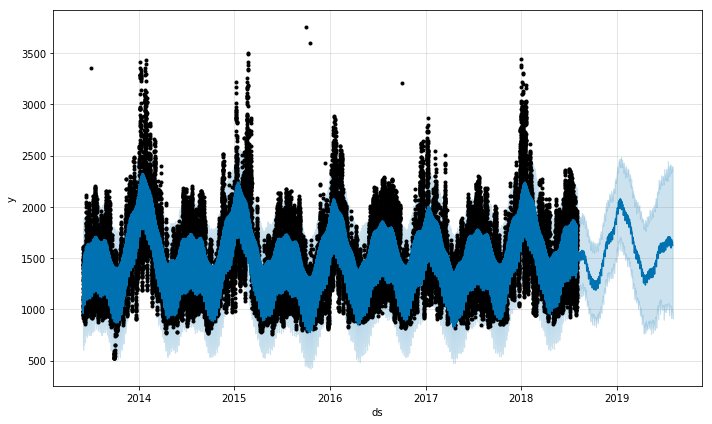

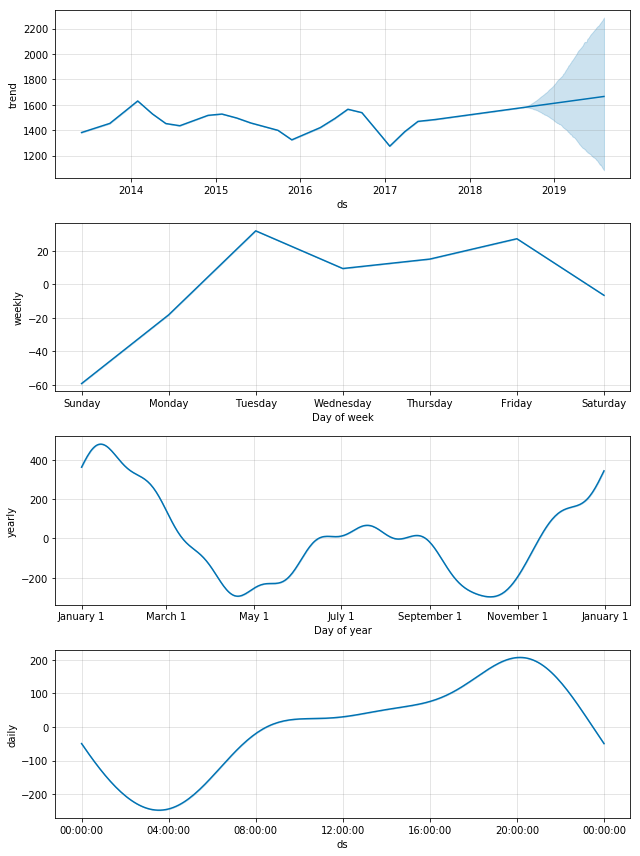

In [3]:
#remove outliers
import numpy as np
df_central_city['y'].values[df_central_city['y'] > 4000]=None

#train model
m_central_city=Prophet()
m_central_city.fit(df_central_city)

#make prediction for next year
future_central_city = m_central_city.make_future_dataframe(periods=365)
forecast_central_city=m_central_city.predict(future_central_city)

#plot forecast and components 
plot_forecast_central_city=m_central_city.plot(forecast_central_city)
plot_components_central_city=m_central_city.plot_components(forecast_central_city)


Four plots are obtained above:
 * Energy Consumption vs time
 * General Trend vs time
 * Weekly seasonality
 * Yearly seasonality
 * Daily seasonality
 
 Performance metrics will be calculated using cross validation. There will be 5 trained models. The train will be for 720 days and prediction for 365 days.

INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-08-14 00:00:00 and 2017-08-03 00:00:00


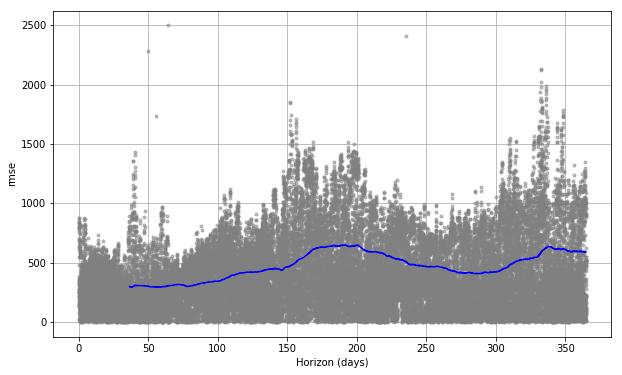

In [4]:
#use cross validation to extract performance metric
# 
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m_central_city,horizon = '365 days',
                        initial='720 days', period='180 days')
df_cv.head()

from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

#plot rmse error on average on one year
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')